In [2]:
import torch
from torch import nn

import matplotlib.pyplot as plt
torch.__version__

'2.3.1'

In [3]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
x = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * x + bias
x[:10], y[:10] , len(x), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [4]:
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test , y_test = x[train_split:] , y[train_split:]

len(x_train), len(y_train), len(x_test), len(x_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data = x_train,train_labels = y_train,test_data = x_test,test_labels = y_test, predictions = None):
    """plots trainig data, test data and compares predictions"""

    plt.figure(figsize=(10,7))

    plt.scatter(train_data,train_labels,c="b",s=4,label="Trainig Data")

    plt.scatter(test_data,test_labels,c="g",s=4, label="Test Data")

    if predictions is not None:
        plt.scatter(test_data,predictions , c="r", label="Predictions")

    plt.legend(prop={"size": 14})

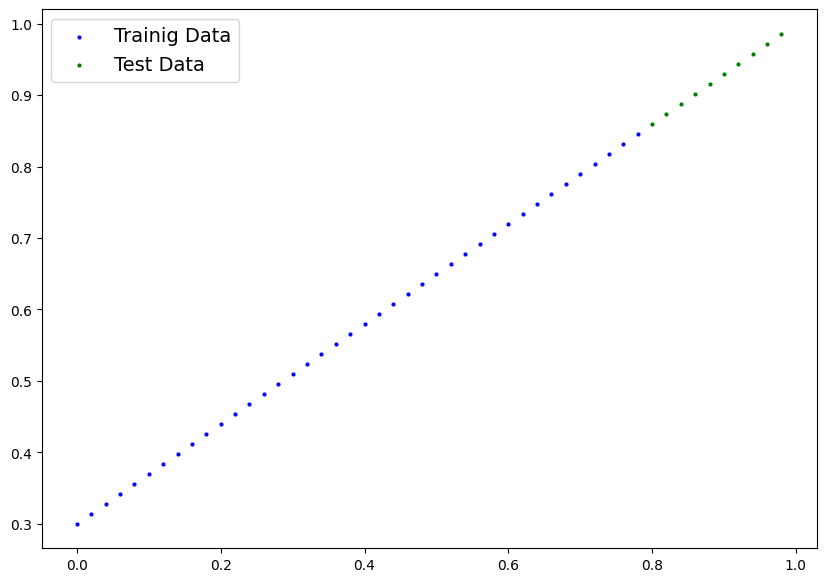

In [6]:
plot_predictions()

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))            
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
                                

In [8]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
weight,bias

(0.7, 0.3)

In [11]:
with torch.inference_mode():
    y_preds = model_0(x_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

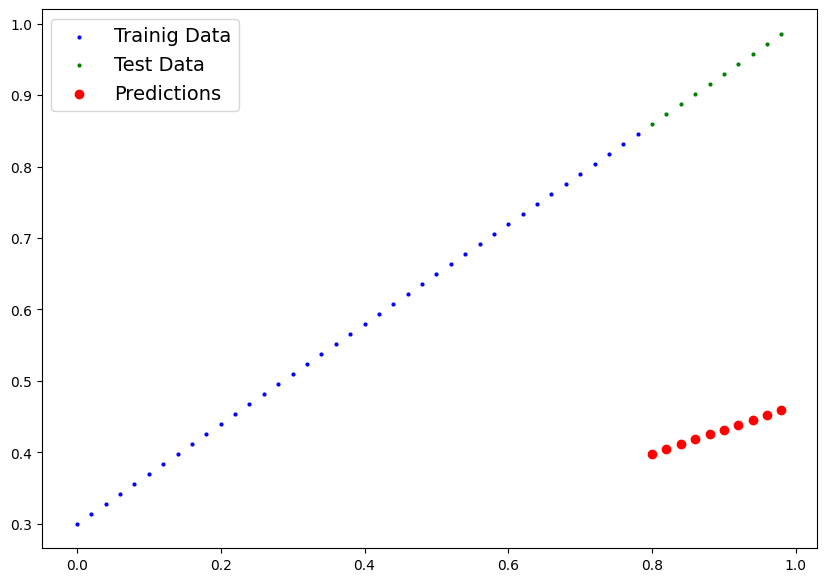

In [13]:
plot_predictions(predictions=y_preds)

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
los_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

L1Loss()

In [ ]:
epochs = 1

for epoch in range(epochs):
    model_0.train()

    y_preds = model_0(x_train)

    loss = los_fn(y_preds,y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()